In [1]:
import pandas as pd
import numpy as np

In [2]:
bank_data = pd.read_csv("bank-additional-full.csv",sep=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

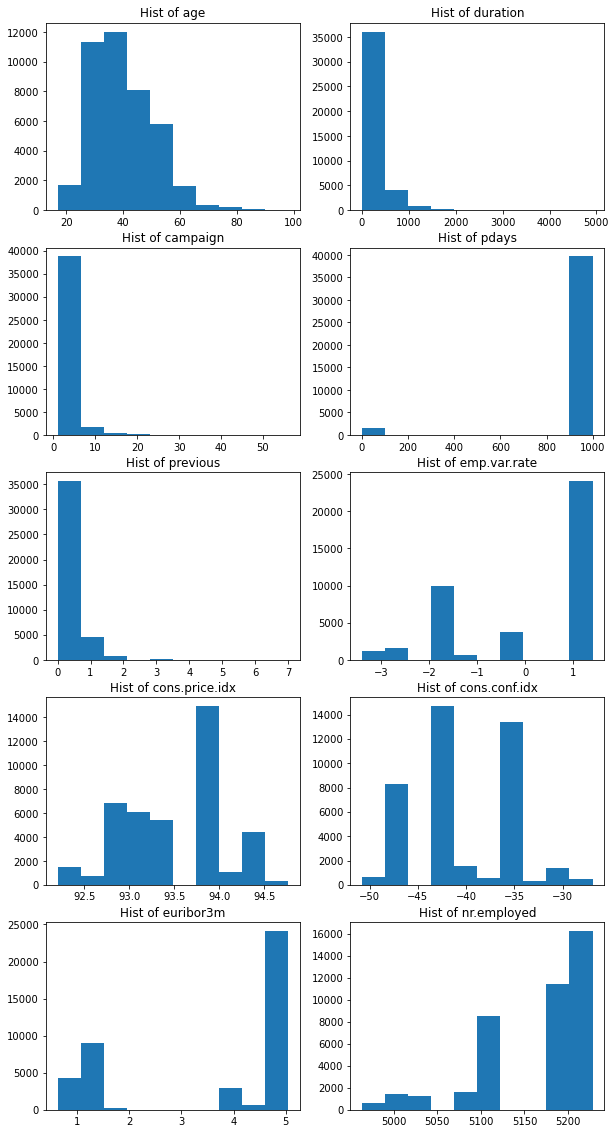

In [4]:
import matplotlib.pyplot as plt

qt_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
ql_cols = bank_data.iloc[:,:-1].select_dtypes(include=['object']).columns
plt.figure(figsize=(10,20))

i = 1
for col in qt_cols:
    plt.subplot(5,2,i)
    i += 1
    plt.hist(bank_data[col])
    plt.title('Hist of '+ col)

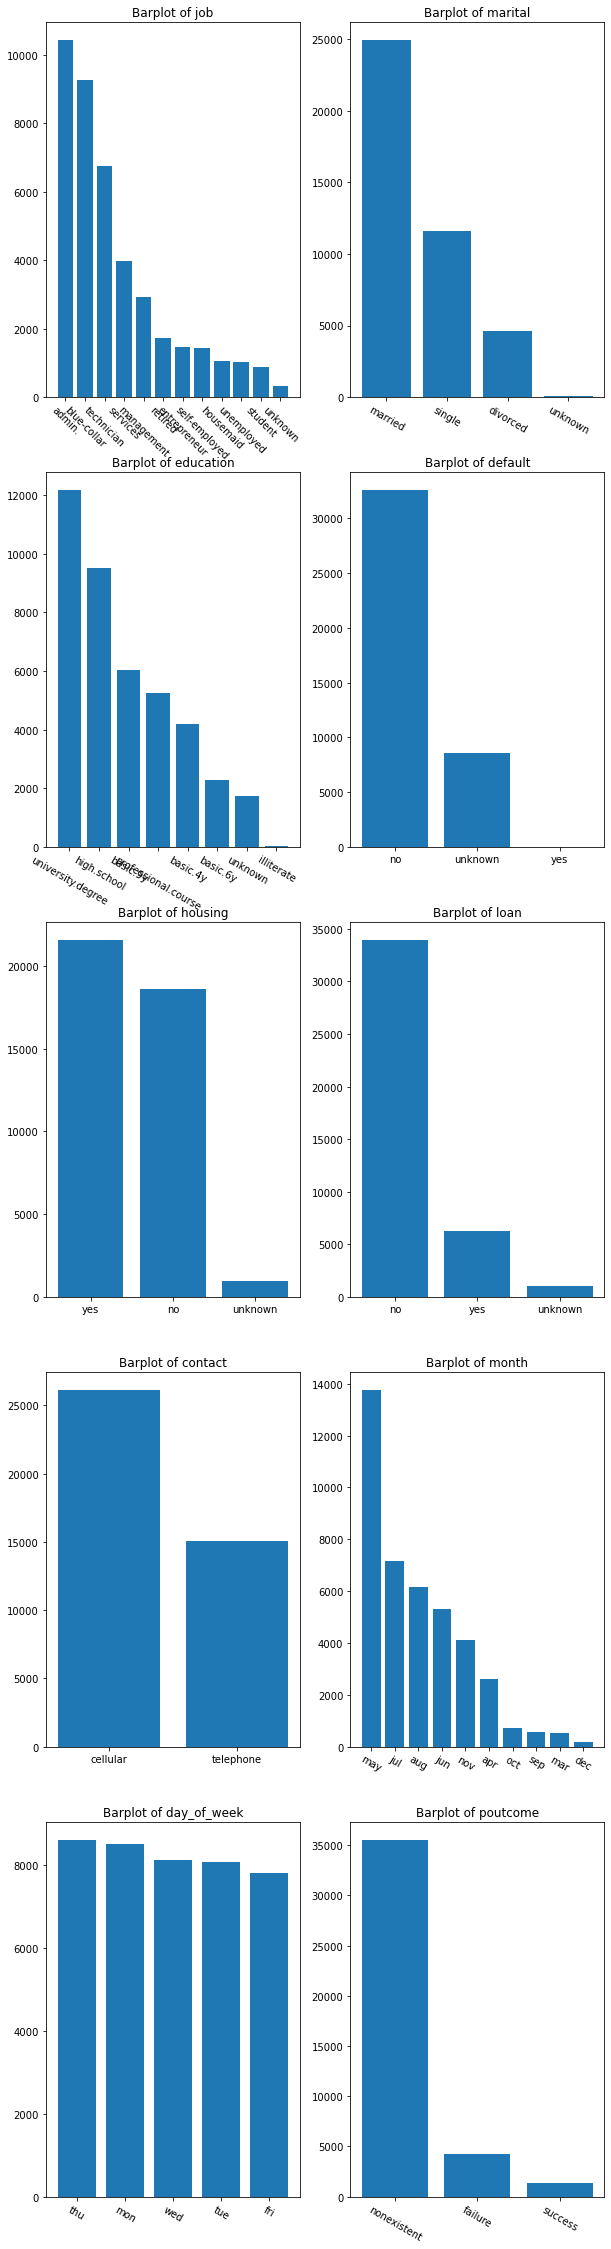

In [60]:
i = 1
plt.figure(figsize=(10,40))
rotation = [45,30,30,0,0,0,0,30,30,30]
for col in ql_cols:   
    plt.subplot(5,2,i)
    plt.bar(bank_data[col].value_counts().index, bank_data[col].value_counts())
    plt.title('Barplot of '+ col)
    plt.xticks(rotation = -rotation[i-1])
    i += 1
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

In [6]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
## need clean the unkown value 
result = {}
for i in bank_data.columns:
    result[i]=(bank_data[i]=='unknown').sum()
result 

{'age': 0,
 'job': 330,
 'marital': 80,
 'education': 1731,
 'default': 8597,
 'housing': 990,
 'loan': 990,
 'contact': 0,
 'month': 0,
 'day_of_week': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 0,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 0,
 'euribor3m': 0,
 'nr.employed': 0,
 'y': 0}

In [8]:
new_table = bank_data.drop(columns="default")

In [9]:
new_table = new_table[(new_table["education"]!="unknown") &\
                      (new_table["housing"]!="unknown")&\
                      (new_table["job"]!="unknown")&(new_table["marital"]!="unknown")]

In [10]:
result = {}
for i in new_table.columns:
    result[i]=(new_table[i]=='unknown').sum()
result

{'age': 0,
 'job': 0,
 'marital': 0,
 'education': 0,
 'housing': 0,
 'loan': 0,
 'contact': 0,
 'month': 0,
 'day_of_week': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 0,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 0,
 'euribor3m': 0,
 'nr.employed': 0,
 'y': 0}

In [11]:
new_table = new_table[new_table["duration"]!=0]

In [12]:
new_table

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
#new_table = pd.get_dummies(new_table,"month")

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in new_table.select_dtypes(include=['object']).columns:
    if column != 'y':  # Exclude target variable for encoding
        le = LabelEncoder()
        new_table[column] = le.fit_transform(new_table[column])
        label_encoders[column] = le
        
new_table

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
# Encoding target variable
new_table['y'] = new_table['y'].map({'no': 0, 'yes': 1})

In [34]:
from sklearn.model_selection import train_test_split
X = new_table.drop('y', axis=1)
y = new_table['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_list = [X.columns]

In [35]:
from sklearn.metrics import recall_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9216891096875408

In [36]:
# Calculating recall score
recall = recall_score(y_test, y_pred)

recall

0.5123152709359606

In [37]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
from sklearn.model_selection import GridSearchCV

# Parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10,15,20, None]
}

# Setting up the grid search with RandomForest and 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [25]:
best_params


{'max_depth': 20, 'n_estimators': 100}

In [26]:
best_score

0.9143893790908771

In [27]:
rf_model = RandomForestClassifier(random_state=42,max_depth=20,n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9207739573800496

In [28]:
recall = recall_score(y_test, y_pred)

recall

0.5172413793103449

In [52]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6720516962843296

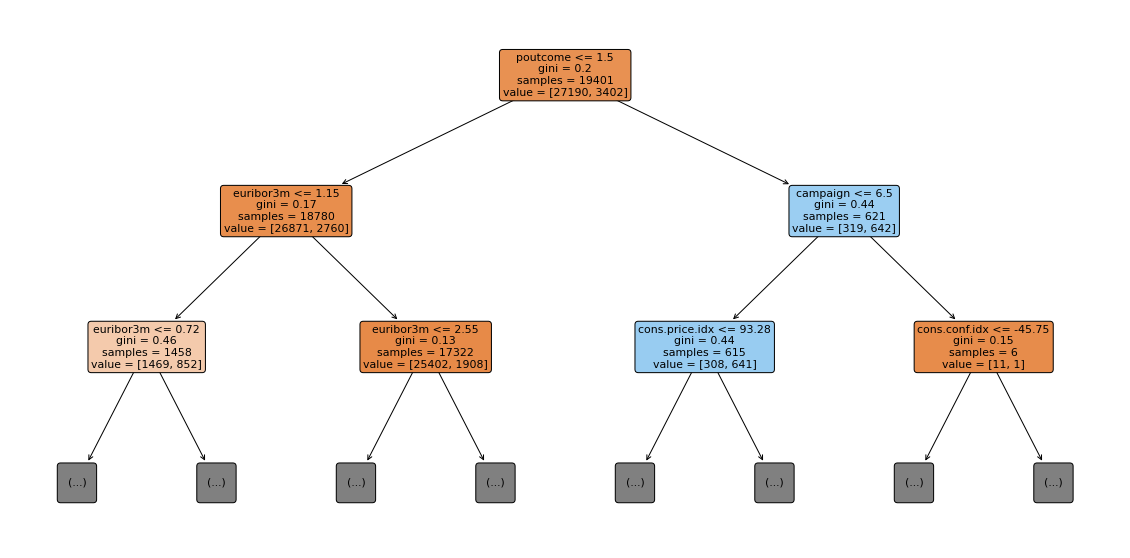

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 假设您已经有了训练好的随机森林模型 rf_model
# 选择随机森林中的第一棵树
tree_in_rf = rf_model.estimators_[0]

# 绘制树的图形表示，这里限制树的深度以便更好地可视化
plt.figure(figsize=(20, 10))
plot_tree(tree_in_rf, max_depth=2, filled=True, feature_names=X_train.columns, rounded=True, proportion=False, precision=2)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier

# 假设您已经训练了随机森林模型 rf_model 并且 X_train 包含了用于模型训练的特征数据

# 获取特征重要性
importances = rf_model.feature_importances_
feature_list = X_train.columns

# 创建特征与其重要性的元组列表
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 按重要性降序排序特征
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# 打印出特征和其重要性
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))


Variable: duration             Importance: 0.33
Variable: euribor3m            Importance: 0.11
Variable: age                  Importance: 0.1
Variable: nr.employed          Importance: 0.06
Variable: job                  Importance: 0.05
Variable: education            Importance: 0.04
Variable: day_of_week          Importance: 0.04
Variable: campaign             Importance: 0.04
Variable: pdays                Importance: 0.03
Variable: poutcome             Importance: 0.03
Variable: cons.conf.idx        Importance: 0.03
Variable: marital              Importance: 0.02
Variable: housing              Importance: 0.02
Variable: month                Importance: 0.02
Variable: emp.var.rate         Importance: 0.02
Variable: cons.price.idx       Importance: 0.02
Variable: loan                 Importance: 0.01
Variable: contact              Importance: 0.01
Variable: previous             Importance: 0.01
